# Satellite Imagery Analysis in Python

## Task 1: Open satellite imagery in Python 

Let us import the libraries. 

In [1]:
#!conda install -c conda-forge matplotlib 
#!pip install matplotlib

In [2]:
import rasterio as rio
import matplotlib 

### Open an image


In [3]:
# Path to the image
path = "./data/small_stacked.tif"

# Open with Rasterio. Let us call it data
data = rio.open(path)

### META Data

* Coordinate Reference System (CRS)

In [4]:
data.crs

CRS.from_epsg(32633)

* width and height

In [5]:
data.width

1092

In [6]:
data.height

831

* Image Bands

In [7]:
data.count

13

* The sentinel 2 data has 13 bands. The following table shows the band name and its resolution
<img src="images/s2-bands.png" width=1600 height=1600 />


* Meta data

In [8]:
data.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -999.0,
 'width': 1092,
 'height': 831,
 'count': 13,
 'crs': CRS.from_epsg(32633),
 'transform': Affine(10.0, 0.0, 367310.0,
        0.0, -10.0, 6163410.0)}

## Task 2: Reading Satellite Image bands

### Read Individual Band

* Read the Red Band / Band 4
* Read the Green Band 

In [9]:
red = data.read(4)
green = data.read(3)
blue = data.read(2)

In [10]:
green

array([[ 470.,  474.,  488., ..., -999., -999., -999.],
       [ 468.,  483.,  482., ..., -999., -999., -999.],
       [ 473.,  481.,  481., ..., -999., -999., -999.],
       ...,
       [1491., 1242., 1061., ..., 1327., 1408., 1631.],
       [1520., 1600., 1460., ..., 1571., 1554., 1668.],
       [ 970., 1215., 1366., ..., 1631., 1652., 1696.]], dtype=float32)

### Statistical Values of the Image

* Mean Pixel Value

In [11]:
red.mean()

952.64935

In [12]:
green.mean()

1027.1161

* The image size (Width and Height)

We can also print out the shape of the image when we read the band. 

In [13]:
red.shape

(831, 1092)

In [14]:
red.shape[1]

1092

### Reading All Bands

In [15]:
all_bands = data.read()

In [16]:
all_bands.shape

(13, 831, 1092)

## Task 3: Visualize Images

In [17]:
from rasterio.plot import show

### Simple Plot

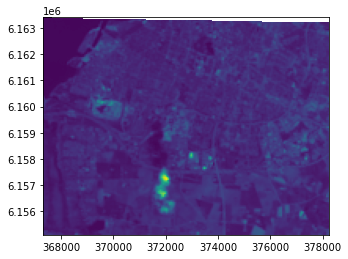

In [18]:
show(data)

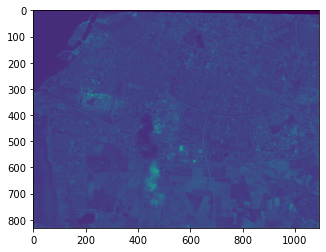

In [19]:
show(red)

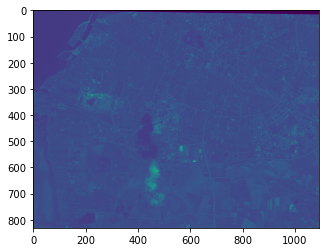

In [20]:
show(green)

### Increasing Plot size

In [22]:
import matplotlib.pyplot as plt

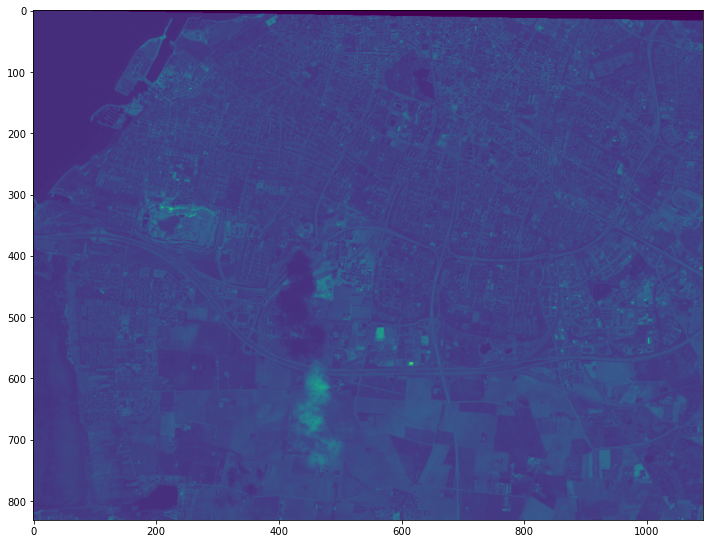

In [24]:
fig, ax = plt.subplots(figsize=(12,10))
show(red, ax = ax)

### Change Colors

* https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html

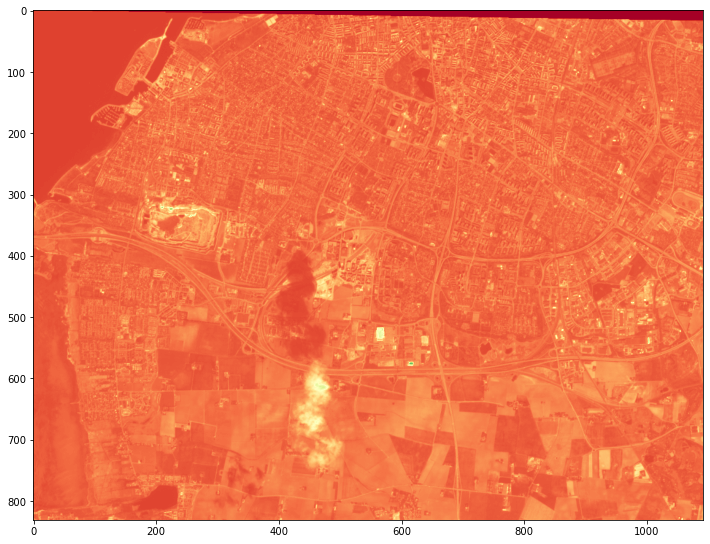

In [25]:
fig, ax = plt.subplots(figsize=(12,10))
show(red, cmap = "RdYlGn", ax = ax)

## Task 4: Numpy Array Manipulations

In [26]:
#Call red band (Arrays)
red

array([[ 261.,  262.,  263., ..., -999., -999., -999.],
       [ 274.,  265.,  267., ..., -999., -999., -999.],
       [ 280.,  271.,  270., ..., -999., -999., -999.],
       ...,
       [1616., 1249.,  949., ..., 1535., 1597., 1857.],
       [1519., 1691., 1609., ..., 1804., 1835., 1961.],
       [ 890., 1219., 1298., ..., 1973., 1959., 2027.]], dtype=float32)

In [27]:
# Red band shape
red.shape

(831, 1092)

In [29]:
# Call all band image arrays
all_bands

array([[[1142., 1139., 1139., ..., -999., -999., -999.],
        [1142., 1139., 1139., ..., -999., -999., -999.],
        [1142., 1139., 1139., ..., -999., -999., -999.],
        ...,
        [1610., 1395., 1395., ..., 1719., 1719., 1719.],
        [1610., 1395., 1395., ..., 1719., 1719., 1719.],
        [1610., 1395., 1395., ..., 1719., 1719., 1719.]],

       [[ 775.,  784.,  782., ..., -999., -999., -999.],
        [ 782.,  784.,  785., ..., -999., -999., -999.],
        [ 784.,  797.,  792., ..., -999., -999., -999.],
        ...,
        [1553., 1274., 1082., ..., 1428., 1447., 1600.],
        [1648., 1734., 1611., ..., 1565., 1571., 1621.],
        [1057., 1253., 1451., ..., 1583., 1606., 1657.]],

       [[ 470.,  474.,  488., ..., -999., -999., -999.],
        [ 468.,  483.,  482., ..., -999., -999., -999.],
        [ 473.,  481.,  481., ..., -999., -999., -999.],
        ...,
        [1491., 1242., 1061., ..., 1327., 1408., 1631.],
        [1520., 1600., 1460., ..., 1571., 155

In [30]:
# Call image_allbands shape
all_bands.shape

(13, 831, 1092)

### Create subset Images with Indexes

In [31]:
# Row indexes

red[200:600]

array([[ 262.,  258.,  259., ..., 1299., 1243., 1100.],
       [ 260.,  260.,  254., ..., 1202., 1142., 1048.],
       [ 266.,  259.,  251., ..., 1102.,  984.,  860.],
       ...,
       [ 589.,  641.,  719., ..., 1410., 1063.,  957.],
       [ 587.,  630.,  681., ..., 1381., 1235.,  968.],
       [ 613.,  600.,  618., ..., 1259., 1304., 1025.]], dtype=float32)

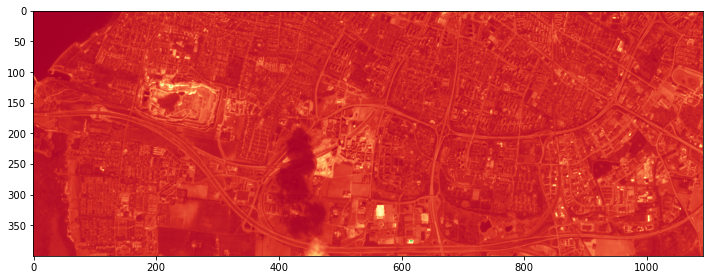

In [32]:
# Visualize row indexing
fig, ax = plt.subplots(figsize=(12,10))
show(red[200:600], cmap = "RdYlGn", ax = ax)

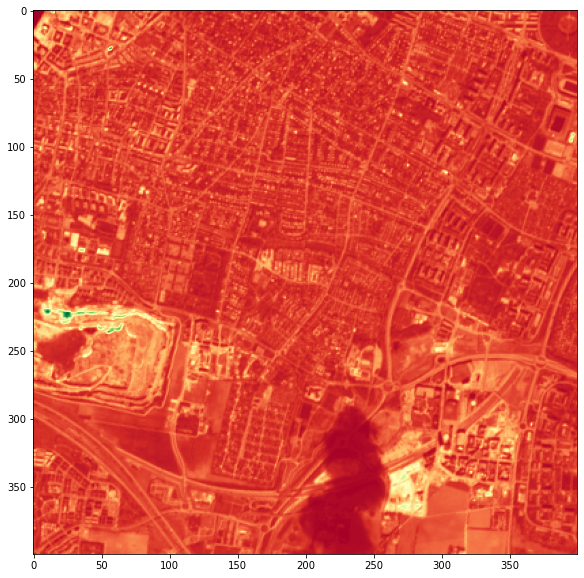

In [33]:
# Visualize row & column indexing
fig, ax = plt.subplots(figsize=(12,10))
show(red[100:500, 200:600], cmap = "RdYlGn", ax = ax)

## Task 5: Clipping Images to Boundaries


### Read Vector Data

In [34]:
# Import geopandas 
import geopandas as gpd

In [35]:
# Read Vector Data
urban = gpd.read_file("./data/vector/urban.shp")

In [ ]:
# Plot vector data


In [ ]:
# call vector data


### Mask the Data

In [ ]:
# import mask


In [ ]:
# Create masked and transform 


In [ ]:
# Copy the meta


In [ ]:
# Updata the meta


In [ ]:
# Check image shape



### Read Masked Image and Visualize

In [ ]:
# Create an empty Image and write to the clipped image


In [ ]:
# Read clipped image from the output folder

In [ ]:
# Visualize the clipped image


## Task 6: Create Vegetation Index

### Open Original JP2 Sentinel Images

In [ ]:
# Open the original image of band 4


In [ ]:
# Open the original image of band 8

In [ ]:
# read Red(b4) and NIR(b8) as arrays


### Calcualte NDVI

In [ ]:
# Calculate ndvi


### Visualize NDVI

In [ ]:
# Call ndvi.shape

In [ ]:
# Visualize a subset


### Write NDVI to an Image

In [ ]:
# Write  an NDVI image 


## Task 7: Derive Statistics.

In [ ]:
# Read Grid Data

In [ ]:
# Read NDVI 

In [ ]:
# Plot Both Grid data and NDVI

In [ ]:
# Create a funciton to derive stats

In [ ]:
# Create a column for Mean

In [ ]:
# Grid head

In [ ]:
# Write to file (shapefile or csv)

## Task 8: Clustering